In [7]:
# !pip install -q google-api-python-client google-generativeai

In [8]:
try:
    assert api_key
except NameError:
    api_key = !op read "op://Private/Google AI Studio Gemini API key/credential"
    assert api_key
    api_key = api_key[0]

In [9]:
import googleapiclient
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import mimetypes
import requests

In [10]:
GENAI_DISCOVERY_URL = f"https://generativelanguage.googleapis.com/$discovery/rest?version=v1beta&key={api_key}"
discovery_docs = requests.get(GENAI_DISCOVERY_URL)
genai_service = googleapiclient.discovery.build_from_document(
    discovery_docs.content, developerKey=api_key
)

In [11]:
# Prepare file to upload to GenAI File API
file_path = "../images/frieren.png"
media = MediaFileUpload(file_path, mimetype=mimetypes.guess_type(file_path)[0])
body = {"file": {"displayName": "Frieren meme"}}

# Upload file
create_file_request = genai_service.media().upload(media_body=media, body=body)
create_file_response = create_file_request.execute()
file_uri = create_file_response["file"]["uri"]
file_mimetype = create_file_response["file"]["mimeType"]
print("Uploaded file: " + file_uri)

Uploaded file: https://generativelanguage.googleapis.com/v1beta/files/tcb305s6dgfa


In [12]:
model = "models/gemini-1.5-pro-latest"
contents = {
    "contents": [
        {
            "parts": [
                {"text": "Describe the image with a creative description"},
                {"file_data": {"file_uri": file_uri, "mime_type": file_mimetype}}
            ]
        }
    ]
}
genai_request = genai_service.models().generateContent(model=model, body=contents)
resp = genai_request.execute()

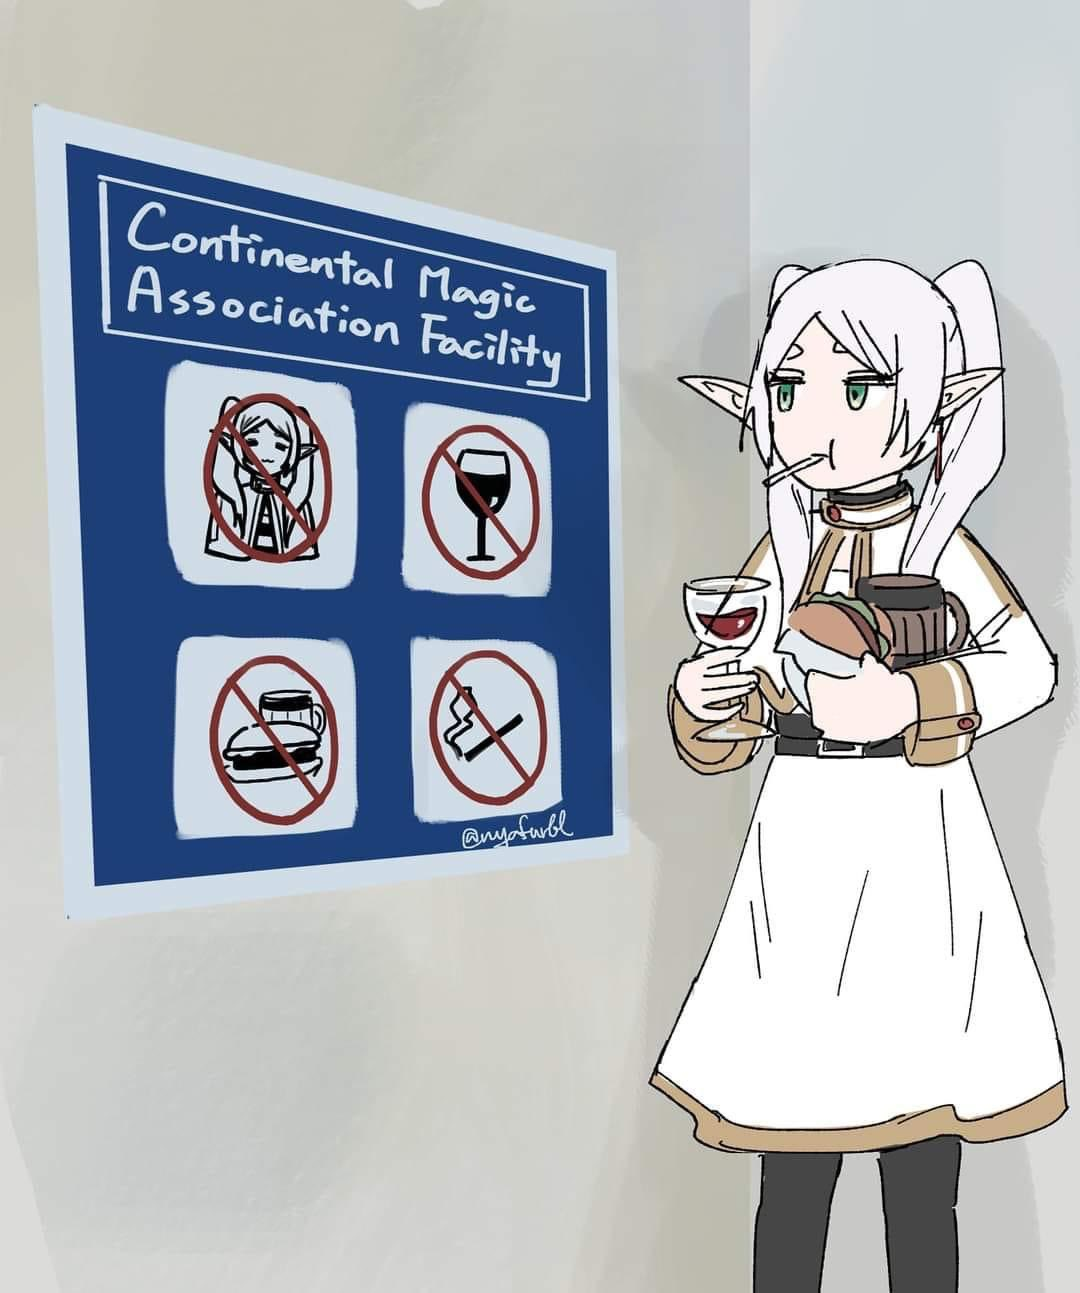

{'candidates': [{'content': {'parts': [{'text': 'A young elf stands in front '
                                                'of a sign that lists the '
                                                'rules of the Continental '
                                                'Magic Association Facility. '
                                                'She is holding a glass of '
                                                'wine and a sandwich, and she '
                                                'is smoking a cigarette. The '
                                                'sign clearly states that all '
                                                'of these things are '
                                                'prohibited, but the elf '
                                                "doesn't seem to care. She has "
                                                'a rebellious look on her '
                                                'face, and she is clear

In [13]:
from pprint import pprint
from IPython.display import Image, display
display(Image(file_path, width=300))
pprint(resp)